In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,f1_score
from sklearn import tree, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV
import time

In [2]:
df=pd.read_csv("data/HTRU_2.csv")

In [3]:
from sklearn.model_selection import train_test_split
# separate target
target = df['Class'].copy()

# split into train and test
X_train,X_test,y_train,y_test = train_test_split(
  df,
  target,
  train_size = 0.9,
  test_size = 0.1,
  random_state = 0,
  shuffle = True
)
features=['Mean of the integrated profile','Standard deviation of the integrated profile','Excess kurtosis of the integrated profile','Skewness of the integrated profile','Mean of the DM-SNR curve','Standard deviation of the DM-SNR curve','Excess kurtosis of the DM-SNR curve','Skewness of the DM-SNR curve']

# convert all back to DataFrame / Series
X_train = pd.DataFrame(X_train,columns=features)
X_test  = pd.DataFrame(X_test,columns=features)
y_train = pd.Series(y_train)
y_test  = pd.Series(y_test)

In [4]:
# now for SMOTE
sm = SMOTE(random_state=0)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

X_smote = pd.DataFrame(X_smote,columns=features)
y_smote = pd.Series(y_smote)

In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [6]:
from sklearn import tree
dtc=tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
dtc.fit(X_smote, y_smote) 
y_pred_dtc =dtc.predict(X_smote)

In [7]:
print("Accuracy on training set:{:.2f}".format(dtc.score(X_smote,y_smote)))
print("Accuracy on test set:{:.2f}".format(dtc.score(X_test,y_test)))

Accuracy on training set:0.95
Accuracy on test set:0.96


# Decision Tree

In [8]:
from sklearn.model_selection import GridSearchCV
classifier=tree.DecisionTreeClassifier()
dt_grid={'max_depth':[3,4,5,6,7,8,9],'criterion':['gini','entropy']}
grid_classifier=GridSearchCV(classifier,dt_grid,cv=10,refit=True,return_train_score=True)
grid_classifier.fit(X_smote,y_smote)
results=grid_classifier.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('best_train_score'))
print(grid_classifier.best_params_)
print(grid_classifier.best_score_)
final_model = grid_classifier.best_estimator_
print(grid_classifier.best_estimator_)

[{'criterion': 'gini', 'max_depth': 3}, {'criterion': 'gini', 'max_depth': 4}, {'criterion': 'gini', 'max_depth': 5}, {'criterion': 'gini', 'max_depth': 6}, {'criterion': 'gini', 'max_depth': 7}, {'criterion': 'gini', 'max_depth': 8}, {'criterion': 'gini', 'max_depth': 9}, {'criterion': 'entropy', 'max_depth': 3}, {'criterion': 'entropy', 'max_depth': 4}, {'criterion': 'entropy', 'max_depth': 5}, {'criterion': 'entropy', 'max_depth': 6}, {'criterion': 'entropy', 'max_depth': 7}, {'criterion': 'entropy', 'max_depth': 8}, {'criterion': 'entropy', 'max_depth': 9}]
[0.9401962  0.94457792 0.94512563 0.94632368 0.94885691 0.95022623
 0.95159555 0.93742334 0.94324289 0.94471493 0.94639231 0.94848052
 0.95073978 0.95190364]
None
{'criterion': 'entropy', 'max_depth': 9}
0.951903642836539
DecisionTreeClassifier(criterion='entropy', max_depth=9)


In [9]:
%%time
from sklearn import tree
dtc=tree.DecisionTreeClassifier(criterion='entropy', max_depth=9)
dtc.fit(X_smote, y_smote) 
y_pred_dtc =dtc.predict(X_test)

Wall time: 320 ms


In [10]:
print("Accuracy on training set:{:.2f}".format(dtc.score(X_smote,y_smote)))
print("Accuracy on test set:{:.2f}".format(dtc.score(X_test,y_test)))

Accuracy on training set:0.96
Accuracy on test set:0.96


In [11]:
print("Accuracy score %f" % accuracy_score(y_test,y_pred_dtc))
print("ROC Score %f" % roc_auc_score(y_test, y_pred_dtc))
print("F1 Score:%f" %f1_score(y_test,y_pred_dtc))
print(classification_report(y_test,y_pred_dtc))

Accuracy score 0.960894
ROC Score 0.938661
F1 Score:0.781250
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1653
           1       0.68      0.91      0.78       137

    accuracy                           0.96      1790
   macro avg       0.84      0.94      0.88      1790
weighted avg       0.97      0.96      0.96      1790



[[1595   58]
 [  12  125]]


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

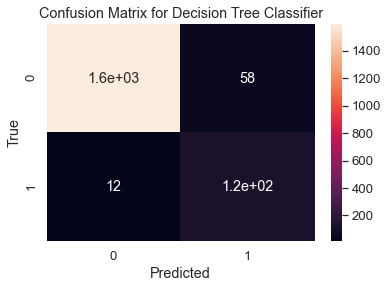

In [12]:
cm_dtc=confusion_matrix(y_test, y_pred_dtc)
print(cm_dtc)

sns.set(font_scale=1.2)
sns.heatmap(cm_dtc, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Decision Tree Classifier")

# Random Forests

In [13]:
from sklearn.ensemble import RandomForestClassifier 

In [14]:
%%time
rfc=RandomForestClassifier(n_estimators=100,max_depth=6)
rfc.fit(X_smote, y_smote)
y_pred_rfc =rfc.predict(X_test)

Wall time: 3.28 s


In [15]:
print("Accuracy on training set:{:.2f}".format(rfc.score(X_smote,y_smote)))
print("Accuracy on test set:{:.2f}".format(rfc.score(X_test,y_test)))

Accuracy on training set:0.95
Accuracy on test set:0.97


In [16]:
print("Accuracy score %f" % accuracy_score(y_test,y_pred_rfc))
print("ROC Score %f" % roc_auc_score(y_test, y_pred_rfc))
print("F1 Score:%f" %f1_score(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

Accuracy score 0.970950
ROC Score 0.947452
F1 Score:0.828947
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1653
           1       0.75      0.92      0.83       137

    accuracy                           0.97      1790
   macro avg       0.87      0.95      0.91      1790
weighted avg       0.97      0.97      0.97      1790



[[1612   41]
 [  11  126]]


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

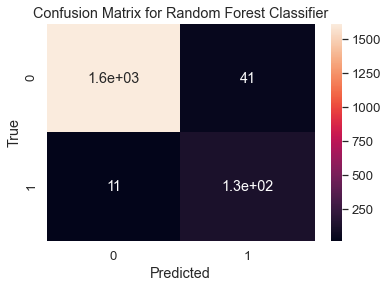

In [17]:
cm_rfc=confusion_matrix(y_test, y_pred_rfc)
print(cm_rfc)

sns.set(font_scale=1.2)
sns.heatmap(cm_rfc, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Random Forest Classifier")

# SVM

In [18]:
from sklearn.svm import SVC

In [19]:
%%time
svc=SVC(C=1.0,kernel='linear')
svc.fit(X_smote,y_smote)
y_pred_svc=svc.predict(X_test)

Wall time: 3min 53s


In [20]:
print("Accuracy on training set:{:.2f}".format(svc.score(X_smote,y_smote)))
print("Accuracy on test set:{:.2f}".format(svc.score(X_test,y_test)))

Accuracy on training set:0.95
Accuracy on test set:0.97


In [21]:
print("Accuracy score %f" % accuracy_score(y_test,y_pred_svc))
print("ROC Score %f" % roc_auc_score(y_test, y_pred_svc))
print("F1 Score:%f" %f1_score(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

Accuracy score 0.973184
ROC Score 0.945315
F1 Score:0.838926
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1653
           1       0.78      0.91      0.84       137

    accuracy                           0.97      1790
   macro avg       0.88      0.95      0.91      1790
weighted avg       0.98      0.97      0.97      1790



[[1617   36]
 [  12  125]]


Text(0.5, 1.0, 'Confusion Matrix for Suport Vector Classifier')

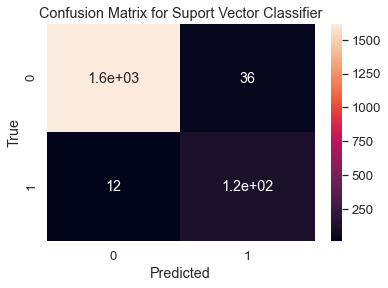

In [22]:
cm_svc=confusion_matrix(y_test, y_pred_svc)
print(cm_svc)

sns.set(font_scale=1.2)
sns.heatmap(cm_svc, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Suport Vector Classifier")

# Bagging

In [23]:
from sklearn.ensemble import BaggingClassifier

In [24]:
%%time
bagc=BaggingClassifier()
bagc.fit(X_smote,y_smote)
y_pred_bagc=bagc.predict(X_test)

Wall time: 2.07 s


In [25]:
print("Accuracy on Training set:{:.2f}".format(bagc.score(X_smote,y_smote)))
print("Accuracyv on Test set:{:.2f}".format(bagc.score(X_test,y_test)))

Accuracy on Training set:1.00
Accuracyv on Test set:0.97


In [26]:
print("Accuracy Score:%f" % accuracy_score(y_test,y_pred_bagc))
print("ROC Score:%f" % roc_auc_score(y_test,y_pred_bagc))
print("F1 Score:%f" %f1_score(y_test,y_pred_bagc))
print(classification_report(y_test,y_pred_bagc))

Accuracy Score:0.971508
ROC Score:0.934366
F1 Score:0.827119
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1653
           1       0.77      0.89      0.83       137

    accuracy                           0.97      1790
   macro avg       0.88      0.93      0.91      1790
weighted avg       0.97      0.97      0.97      1790



[[1617   36]
 [  15  122]]


Text(0.5, 1.0, 'Confusion Matrix for Suport Vector Classifier')

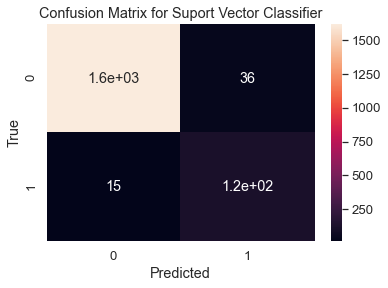

In [27]:
cm_bagc=confusion_matrix(y_test, y_pred_bagc)
print(cm_bagc)

sns.set(font_scale=1.2)
sns.heatmap(cm_bagc, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Suport Vector Classifier")

# XGBOOST

In [28]:
from xgboost import XGBClassifier

In [29]:
%%time
xgbc=XGBClassifier()
xgbc.fit(X_smote,y_smote)
y_pred_xgbc=xgbc.predict(X_test)

C:\Users\apratim sadhu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:05:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 2.6 s


In [30]:
print("Accuracy on Training set:{:.2f}".format(xgbc.score(X_smote,y_smote)))
print("Accuracyv on Test set:{:.2f}".format(xgbc.score(X_test,y_test)))

Accuracy on Training set:0.99
Accuracyv on Test set:0.97


In [31]:
print("Accuracy Score:%f" % accuracy_score(y_test,y_pred_xgbc))
print("ROC Score:%f" % roc_auc_score(y_test,y_pred_xgbc))
print("F1 Score:%f" %f1_score(y_test,y_pred_xgbc))
print(classification_report(y_test,y_pred_xgbc))

Accuracy Score:0.970950
ROC Score:0.940758
F1 Score:0.826667
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1653
           1       0.76      0.91      0.83       137

    accuracy                           0.97      1790
   macro avg       0.88      0.94      0.91      1790
weighted avg       0.97      0.97      0.97      1790



[[1614   39]
 [  13  124]]


Text(0.5, 1.0, 'Confusion Matrix for Suport Vector Classifier')

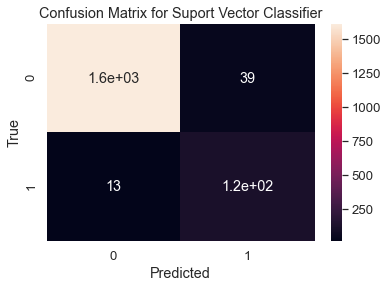

In [32]:
cm_xgbc=confusion_matrix(y_test, y_pred_xgbc)
print(cm_xgbc)

sns.set(font_scale=1.2)
sns.heatmap(cm_xgbc, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Suport Vector Classifier")

# ADABOOST

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

# %%time
adac=AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1)
adac.fit(X_smote,y_smote)
y_pred_adac=adac.predict(X_test)

In [34]:
print("Accuracy on Training set:{:.2f}".format(adac.score(X_smote,y_smote)))
print("Accuracyv on Test set:{:.2f}".format(adac.score(X_test,y_test)))

Accuracy on Training set:1.00
Accuracyv on Test set:0.96


In [35]:
print("Accuracy Score:%f" % accuracy_score(y_test,y_pred_adac))
print("ROC Score:%f" % roc_auc_score(y_test,y_pred_adac))
print("F1 Score:%f" %f1_score(y_test,y_pred_adac))
print(classification_report(y_test,y_pred_adac))

Accuracy Score:0.957542
ROC Score:0.930151
F1 Score:0.763975
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1653
           1       0.66      0.90      0.76       137

    accuracy                           0.96      1790
   macro avg       0.83      0.93      0.87      1790
weighted avg       0.97      0.96      0.96      1790



[[1591   62]
 [  14  123]]


Text(0.5, 1.0, 'Confusion Matrix for Suport Vector Classifier')

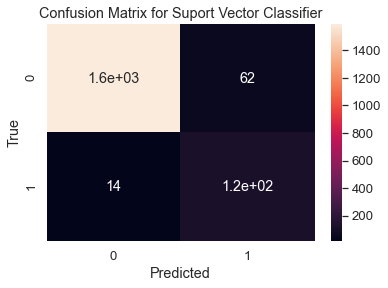

In [36]:
cm_adac=confusion_matrix(y_test, y_pred_adac)
print(cm_adac)

sns.set(font_scale=1.2)
sns.heatmap(cm_adac, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Suport Vector Classifier")

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
%%time
gdc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
gdc.fit(X_train,y_train)
y_pred_gdc=gdc.predict(X_test)

Wall time: 1.75 s


In [39]:
print("Accuracy on Training set:{:.2f}".format(gdc.score(X_smote,y_smote)))
print("Accuracyv on Test set:{:.2f}".format(gdc.score(X_test,y_test)))

Accuracy on Training set:0.91
Accuracyv on Test set:0.98


In [40]:
print("Accuracy Score:%f" % accuracy_score(y_test,y_pred_gdc))
print("ROC Score:%f" % roc_auc_score(y_test,y_pred_gdc))
print("F1 Score:%f" %f1_score(y_test,y_pred_gdc))
print(classification_report(y_test,y_pred_gdc))

Accuracy Score:0.984358
ROC Score:0.927935
F1 Score:0.893939
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1653
           1       0.93      0.86      0.89       137

    accuracy                           0.98      1790
   macro avg       0.96      0.93      0.94      1790
weighted avg       0.98      0.98      0.98      1790



[[1644    9]
 [  19  118]]


Text(0.5, 1.0, 'Confusion Matrix for Suport Vector Classifier')

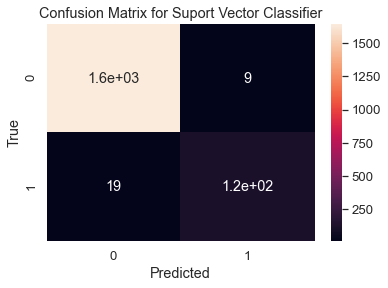

In [41]:
cm_gdc=confusion_matrix(y_test, y_pred_gdc)
print(cm_gdc)

sns.set(font_scale=1.2)
sns.heatmap(cm_gdc, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Suport Vector Classifier")

# COMPARISON

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import time
dt=tree.DecisionTreeClassifier()

In [43]:
algo_list = []
algo_list.append(('Logistic Regression', LogisticRegression()))
algo_list.append(('K-Nearest Neighbor',KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2 )))
algo_list.append(('Support Vector Machine', SVC(C=1.0,kernel='linear')))
algo_list.append(('Decision Tree', tree.DecisionTreeClassifier(criterion='entropy', max_depth=6))) 
algo_list.append(('Random Forest', RandomForestClassifier(n_estimators=100,max_depth=9)))
algo_list.append(('Bagging', BaggingClassifier()))
algo_list.append(('XGBoost',XGBClassifier(use_label_encoder =False,eval_metric='mlogloss')))
algo_list.append(('AdaBoost', AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1)))
algo_list.append(('Gradient Descent', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)))

In [44]:
#finding accuracy
num_folds = 10
results = []
names = []

for name, model in algo_list:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, X_smote, y_smote, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Logistic Regression: 0.942523 (0.003502) (run time: 2.562941)
K-Nearest Neighbor: 0.954813 (0.003819) (run time: 1.551858)
Support Vector Machine: 0.944817 (0.003631) (run time: 1982.551179)
Decision Tree: 0.946871 (0.003526) (run time: 2.319746)
Random Forest: 0.957380 (0.002771) (run time: 38.279580)
Bagging: 0.972100 (0.002233) (run time: 16.512821)
XGBoost: 0.973299 (0.002382) (run time: 22.299065)
AdaBoost: 0.960324 (0.002305) (run time: 2.760613)
Gradient Descent: 0.948138 (0.004395) (run time: 27.014884)


In [45]:
#finding f1
num_folds = 10
results = []
names = []

for name, model in algo_list:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, X_smote, y_smote, cv=kfold, scoring='f1')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Logistic Regression: 0.940861 (0.004063) (run time: 2.632900)
K-Nearest Neighbor: 0.955628 (0.003756) (run time: 1.701448)
Support Vector Machine: 0.942873 (0.004079) (run time: 1929.779719)
Decision Tree: 0.945703 (0.004206) (run time: 2.213259)
Random Forest: 0.955979 (0.003743) (run time: 35.661593)
Bagging: 0.972193 (0.003132) (run time: 15.564357)
XGBoost: 0.973241 (0.002562) (run time: 19.132809)
AdaBoost: 0.961252 (0.003108) (run time: 2.765659)
Gradient Descent: 0.947132 (0.004646) (run time: 25.826897)


In [46]:
#finding roc_auc
num_folds = 10
results = []
names = []

for name, model in algo_list:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, X_smote, y_smote, cv=kfold, scoring='roc_auc')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Logistic Regression: 0.978158 (0.002361) (run time: 2.984718)
K-Nearest Neighbor: 0.986646 (0.001293) (run time: 0.917588)
Support Vector Machine: 0.978602 (0.002289) (run time: 1913.344649)
Decision Tree: 0.983552 (0.002384) (run time: 2.163159)
Random Forest: 0.992972 (0.001141) (run time: 35.043633)
Bagging: 0.992259 (0.001354) (run time: 19.295471)
XGBoost: 0.996275 (0.000742) (run time: 19.641556)
AdaBoost: 0.960007 (0.003179) (run time: 2.812537)
Gradient Descent: 0.986746 (0.001677) (run time: 25.928550)


In [47]:
# finding precision
num_folds = 10
results = []
names = []

for name, model in algo_list:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, X_smote, y_smote, cv=kfold, scoring='precision')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Logistic Regression: 0.968183 (0.005007) (run time: 2.777014)
K-Nearest Neighbor: 0.938508 (0.006652) (run time: 2.019813)
Support Vector Machine: 0.976699 (0.003909) (run time: 1943.582667)
Decision Tree: 0.967051 (0.007032) (run time: 2.440472)
Random Forest: 0.979211 (0.004142) (run time: 36.758801)
Bagging: 0.979128 (0.003943) (run time: 16.265482)
XGBoost: 0.974618 (0.003730) (run time: 25.935644)
AdaBoost: 0.956625 (0.004971) (run time: 2.939136)
Gradient Descent: 0.965422 (0.005018) (run time: 26.777137)


In [48]:
#finding recall
num_folds = 10
results = []
names = []

for name, model in algo_list:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, X_smote, y_smote, cv=kfold, scoring='recall')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Logistic Regression: 0.915060 (0.005243) (run time: 2.240696)
K-Nearest Neighbor: 0.973426 (0.004458) (run time: 1.813149)
Support Vector Machine: 0.911321 (0.005097) (run time: 1977.241506)
Decision Tree: 0.925140 (0.009660) (run time: 2.330800)
Random Forest: 0.933470 (0.005876) (run time: 36.311893)
Bagging: 0.967288 (0.004639) (run time: 15.802842)
XGBoost: 0.971902 (0.005684) (run time: 22.862774)
AdaBoost: 0.966847 (0.002864) (run time: 2.862381)
Gradient Descent: 0.929554 (0.006903) (run time: 26.659833)


  Algorithm  Accuracy    F-1  Precision  Recall  ROC-AUC
0        LG     94.25  94.08      96.81   91.50    97.81
1       KNN     95.48  95.56      93.85   97.34    98.66
2       SVM     94.48  94.28      97.66   91.13    97.86
3        DT     94.68  94.57      96.70   92.51    98.35
4        RF     95.73  95.59      97.92   93.34    99.29
5   MetaBag     97.21  97.21      97.91   96.72    99.22
6   XGBoost     97.32  97.32      97.46   97.19    99.62
7  AdaBoost     96.03  96.12      95.66   96.66    96.00
8   GDBoost     94.81  94.71      96.54   92.95    98.67


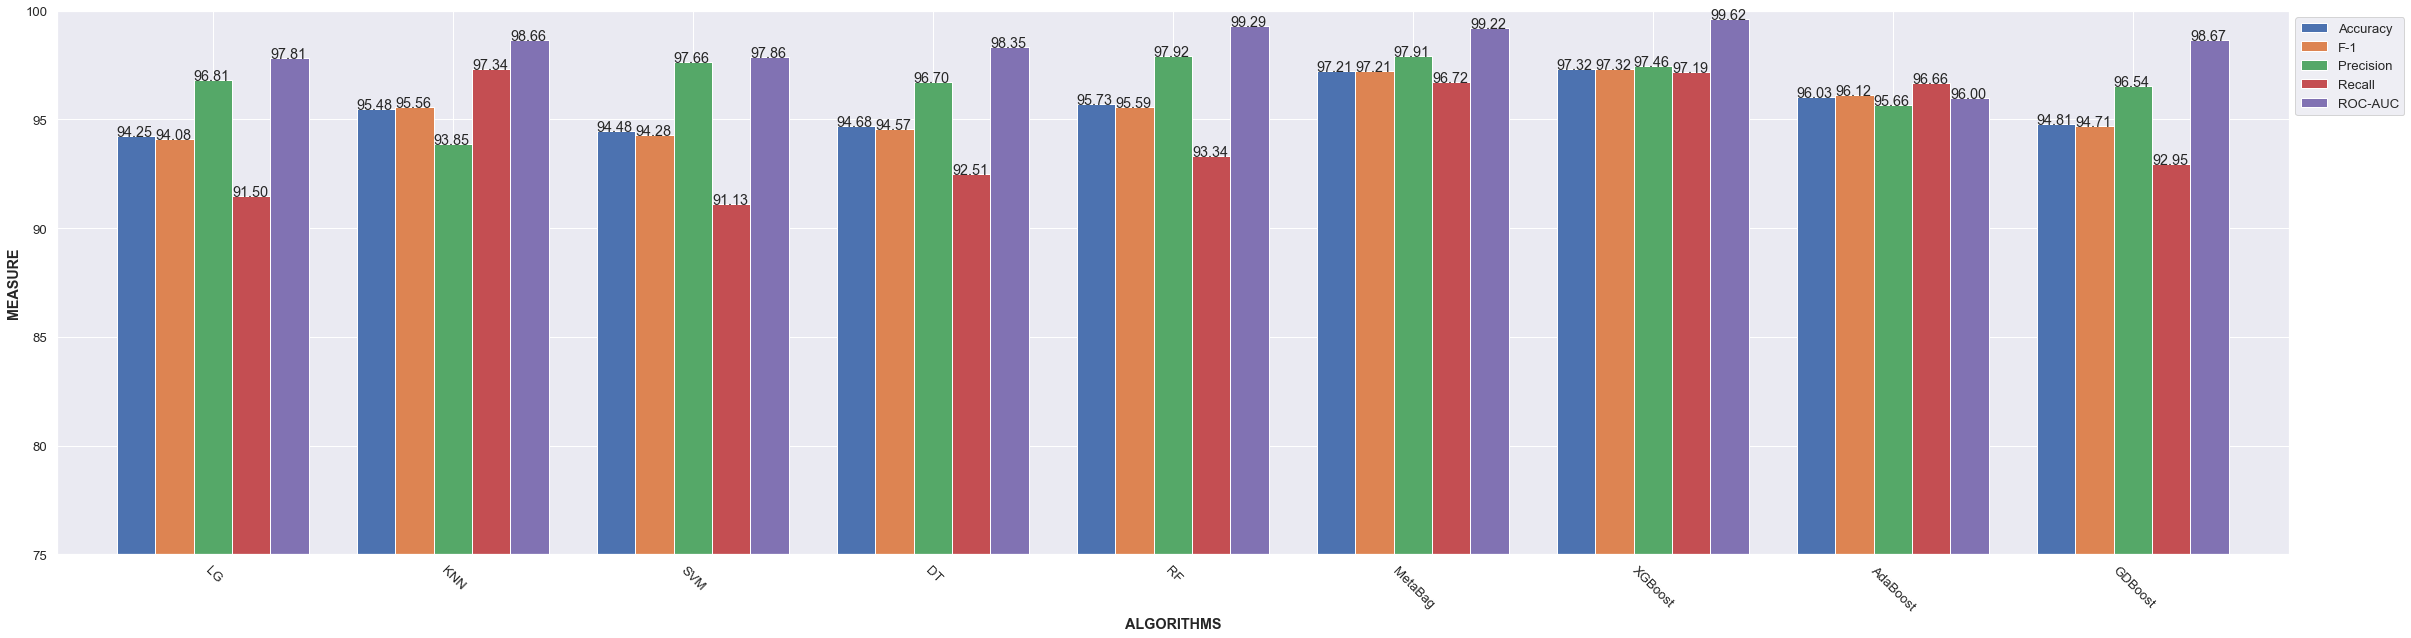

In [50]:
from decimal import Decimal
df1 = pd.DataFrame({
    'Algorithm': ['LG','KNN','SVM','DT','RF','MetaBag','XGBoost','AdaBoost','GDBoost'],
    'Accuracy': [94.25,95.48,94.48,94.68,95.73,97.21,97.32,96.03,94.81],
    'F-1': [94.08,95.56,94.28,94.57,95.59,97.21,97.32,96.12,94.71],
    'Precision': [96.81,93.85,97.66,96.70,97.92,97.91,97.46,95.66,96.54],
    'Recall': [91.50,97.34,91.13,92.51,93.34,96.72,97.19,96.66,92.95],
    'ROC-AUC':[97.81,98.66,97.86,98.35,99.29,99.22,99.62,96.00,98.67]
})

print(df1)
df1.head(10)

#fig = plt.figure(figsize=(20,20))
sns.set_style("darkgrid")
ax=df1.plot(x="Algorithm",y=["Accuracy","F-1","Precision","Recall","ROC-AUC"],kind="bar",width=0.8,figsize=(40,10))
for p in ax.patches:
    ax.annotate('{:.2f}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.xlabel("ALGORITHMS",fontweight='bold')
plt.ylabel("MEASURE",fontweight='bold')
plt.xticks(rotation=-45)
plt.ylim(75,100)
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.show()
# plt.savefig("performance comparison of the algorithms.jpg")

  Algorithm  Accuracy
0        LG     94.25
1       KNN     95.48
2       SVM     94.48
3        DT     94.68
4        RF     95.73
5   MetaBag     97.21
6   XGBoost     97.32
7  AdaBoost     96.03
8   GDBoost     94.81


<Figure size 1440x1440 with 0 Axes>

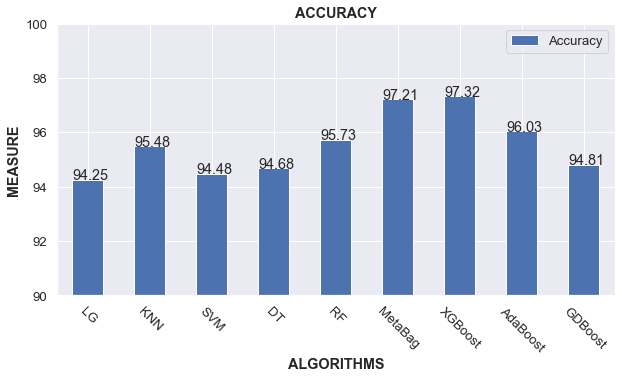

In [53]:
from decimal import Decimal
df2= pd.DataFrame({
    'Algorithm': ['LG','KNN','SVM','DT','RF','MetaBag','XGBoost','AdaBoost','GDBoost'],
    'Accuracy': [94.25,95.48,94.48,94.68,95.73,97.21,97.32,96.03,94.81]
})
print(df2)
df2.head(10)

fig = plt.figure(figsize=(20,20))
sns.set_style("darkgrid")
ax=df2.plot(x="Algorithm",y=["Accuracy"],kind="bar",width=0.5,figsize=(10,5))
for p in ax.patches:
    ax.annotate('{:.2f}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.xlabel("ALGORITHMS",fontweight='bold')
plt.ylabel("MEASURE",fontweight='bold')
plt.xticks(rotation=-45)
plt.ylim(90,100)
plt.title('ACCURACY',fontweight='bold')
plt.show()
# plt.savefig("accuracy comparison of the algorithms.jpg")

  Algorithm    F-1
0        LG  94.08
1       KNN  95.56
2       SVM  94.28
3        DT  94.57
4        RF  95.59
5   MetaBag  97.21
6   XGBoost  97.32
7  AdaBoost  96.12
8   GDBoost  94.71


<Figure size 1440x1440 with 0 Axes>

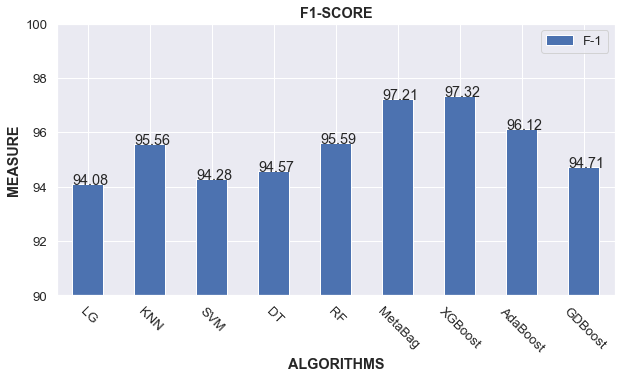

<Figure size 432x288 with 0 Axes>

In [55]:
df3 = pd.DataFrame({
    'Algorithm': ['LG','KNN','SVM','DT','RF','MetaBag','XGBoost','AdaBoost','GDBoost'],
    'F-1': [94.08,95.56,94.28,94.57,95.59,97.21,97.32,96.12,94.71]
})

print(df3)
df3.head(10)

fig = plt.figure(figsize=(20,20))
sns.set_style("darkgrid")
ax=df3.plot(x="Algorithm",y=["F-1"],kind="bar",width=0.5,figsize=(10,5))
for p in ax.patches:
    ax.annotate('{:.2f}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.xlabel("ALGORITHMS",fontweight='bold')
plt.ylabel("MEASURE",fontweight='bold')
plt.xticks(rotation=-45)
plt.ylim(90,100)
plt.title('F1-SCORE',fontweight='bold')
#plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.show()
plt.savefig("f1-score comparison of the algorithms.jpg")

  Algorithm  ROC-AUC
0        LG    97.81
1       KNN    98.66
2       SVM    97.86
3        DT    98.35
4        RF    99.29
5   MetaBag    99.22
6   XGBoost    99.62
7  AdaBoost    96.00
8   GDBoost    98.67


<Figure size 1440x1440 with 0 Axes>

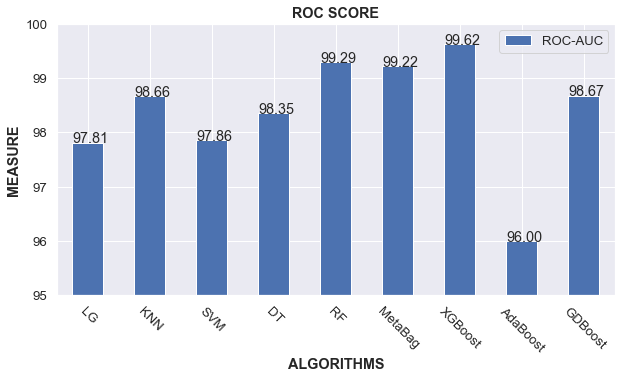

<Figure size 432x288 with 0 Axes>

In [65]:
df4 = pd.DataFrame({
    'Algorithm': ['LG','KNN','SVM','DT','RF','MetaBag','XGBoost','AdaBoost','GDBoost'],
    'ROC-AUC':[97.81,98.66,97.86,98.35,99.29,99.22,99.62,96.00,98.67]
})

print(df4)
df4.head(10)

fig = plt.figure(figsize=(20,20))
sns.set_style("darkgrid")
ax=df4.plot(x="Algorithm",y=["ROC-AUC"],kind="bar",width=0.5,figsize=(10,5))
for p in ax.patches:
    ax.annotate('{:.2f}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.xlabel("ALGORITHMS",fontweight='bold')
plt.ylabel("MEASURE",fontweight='bold')
plt.xticks(rotation=-45)
plt.ylim(95,100)
plt.title('ROC SCORE',fontweight='bold')
#plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.show()
plt.savefig("roc score comparison of the algorithms.jpg")

  Algorithm  Precision
0        LG      96.81
1       KNN      93.85
2       SVM      97.66
3        DT      96.70
4        RF      97.92
5   MetaBag      97.91
6   XGBoost      97.46
7  AdaBoost      95.66
8   GDBoost      96.54


<Figure size 1440x1440 with 0 Axes>

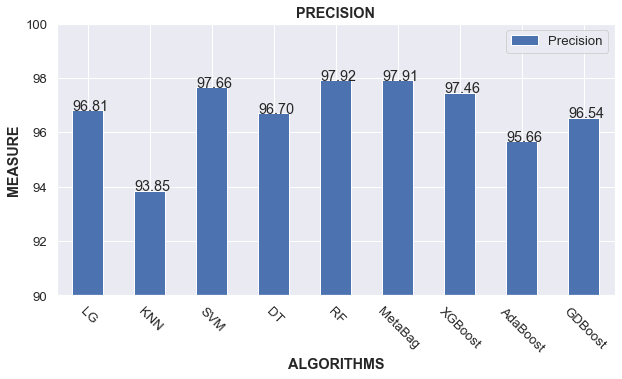

<Figure size 432x288 with 0 Axes>

In [64]:
df5 = pd.DataFrame({
    'Algorithm': ['LG','KNN','SVM','DT','RF','MetaBag','XGBoost','AdaBoost','GDBoost'],
    'Precision': [96.81,93.85,97.66,96.70,97.92,97.91,97.46,95.66,96.54]
})

print(df5)
df5.head(10)

fig = plt.figure(figsize=(20,20))
sns.set_style("darkgrid")
ax=df5.plot(x="Algorithm",y=["Precision"],kind="bar",width=0.5,figsize=(10,5))
for p in ax.patches:
    ax.annotate('{:.2f}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.xlabel("ALGORITHMS",fontweight='bold')
plt.ylabel("MEASURE",fontweight='bold')
plt.xticks(rotation=-45)
plt.ylim(90,100)
plt.title('PRECISION',fontweight='bold')
#plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.show()
plt.savefig("precision comparison of the algorithms.jpg")

  Algorithm  Recall
0        LG   91.50
1       KNN   97.34
2       SVM   91.13
3        DT   92.51
4        RF   93.34
5   MetaBag   96.72
6   XGBoost   97.19
7  AdaBoost   96.66
8   GDBoost   92.95


<Figure size 1440x1440 with 0 Axes>

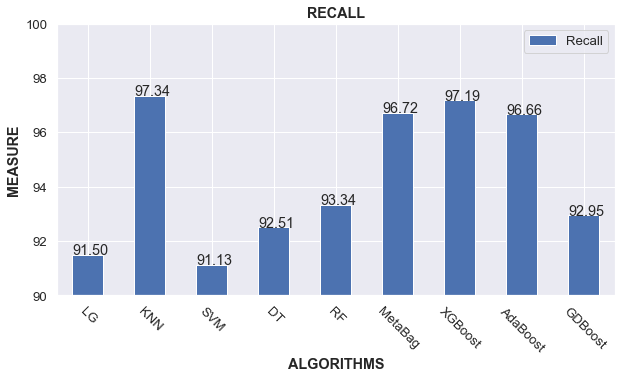

<Figure size 432x288 with 0 Axes>

In [60]:
df6 = pd.DataFrame({
    'Algorithm': ['LG','KNN','SVM','DT','RF','MetaBag','XGBoost','AdaBoost','GDBoost'],
    'Recall': [91.50,97.34,91.13,92.51,93.34,96.72,97.19,96.66,92.95]
})

print(df6)
df6.head(10)

fig = plt.figure(figsize=(20,20))
sns.set_style("darkgrid")
ax=df6.plot(x="Algorithm",y=["Recall"],kind="bar",width=0.5,figsize=(10,5))
for p in ax.patches:
    ax.annotate('{:.2f}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.xlabel("ALGORITHMS",fontweight='bold')
plt.ylabel("MEASURE",fontweight='bold')
plt.xticks(rotation=-45)
plt.ylim(90,100)
plt.title('RECALL',fontweight='bold')
#plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.show()
plt.savefig("Recall comparison of the algorithms.jpg")

  Algorithm  Run Time
0        LG      2.56
1       KNN      1.55
2       SVM   1982.55
3        DT      2.31
4        RF     38.27
5   MetaBag     16.51
6   XGBoost     22.29
7  AdaBoost      2.76
8   GDBoost     27.01


<Figure size 1440x1440 with 0 Axes>

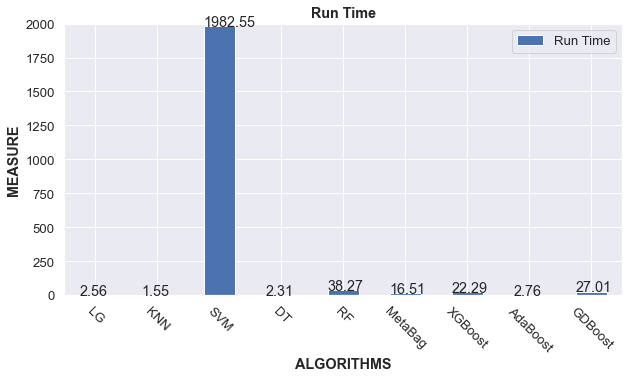

In [68]:
df7 = pd.DataFrame({
    'Algorithm': ['LG','KNN','SVM','DT','RF','MetaBag','XGBoost','AdaBoost','GDBoost'],
    'Run Time': [2.56,1.55,1982.55,2.31,38.27,16.51,22.29,2.76,27.01],
})

print(df7)
df7.head(10)

fig = plt.figure(figsize=(20,20))
sns.set_style("darkgrid")
ax=df7.plot(x="Algorithm",y=["Run Time"],kind="bar",width=0.5,figsize=(10,5))
for p in ax.patches:
    ax.annotate('{:.2f}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.xlabel("ALGORITHMS",fontweight='bold')
plt.ylabel("MEASURE",fontweight='bold')
plt.xticks(rotation=-45)
plt.ylim(0,2000)
plt.title('Run Time',fontweight='bold')
# plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.show()
# plt.savefig("precision comparison of the algorithms.jpg")

# NEURAL NETWORK

In [91]:
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [99]:
model3=Sequential()
model3.add(Dense(32,input_dim=8,activation='relu'))
model3.add(Dense(16,activation='relu'))
model3.add(Dropout(0.15))
model3.add(Dense(16,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(8,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(4,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

In [100]:
from keras import backend as K
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [101]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [102]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [104]:
history=model3.fit(X_smote,y_smote,epochs=100,batch_size=32,validation_split=0.1)

Epoch 1/100
822/822 [==============================] - 1s 2ms/step - loss: 0.1960 - accuracy: 0.9315 - precision: 0.9508 - recall: 0.8919 - auc: 0.9699 - f1_score: 0.9177 - val_loss: 0.3042 - val_accuracy: 0.8809 - val_precision: 1.0000 - val_recall: 0.8809 - val_auc: 0.0000e+00 - val_f1_score: 0.9350
Epoch 2/100
822/822 [==============================] - 1s 2ms/step - loss: 0.1951 - accuracy: 0.9305 - precision: 0.9512 - recall: 0.8893 - auc: 0.9705 - f1_score: 0.9162 - val_loss: 0.2432 - val_accuracy: 0.8888 - val_precision: 1.0000 - val_recall: 0.8888 - val_auc: 0.0000e+00 - val_f1_score: 0.9400
Epoch 3/100
822/822 [==============================] - 2s 2ms/step - loss: 0.1930 - accuracy: 0.9308 - precision: 0.9500 - recall: 0.8911 - auc: 0.9711 - f1_score: 0.9170 - val_loss: 0.2919 - val_accuracy: 0.8830 - val_precision: 1.0000 - val_recall: 0.8830 - val_auc: 0.0000e+00 - val_f1_score: 0.9364
Epoch 4/100
822/822 [==============================] - 2s 2ms/step - loss: 0.1913 - accurac

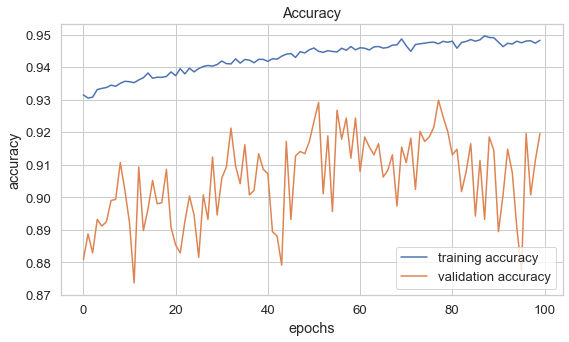

In [105]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(9,5))

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('figures/accuracy.jpg')

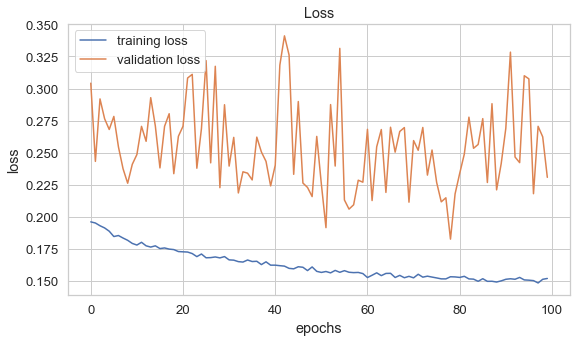

In [106]:
#fig.add_subplot(gs[2])
fig = plt.figure(figsize=(9,5))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('figures/loss.jpg')

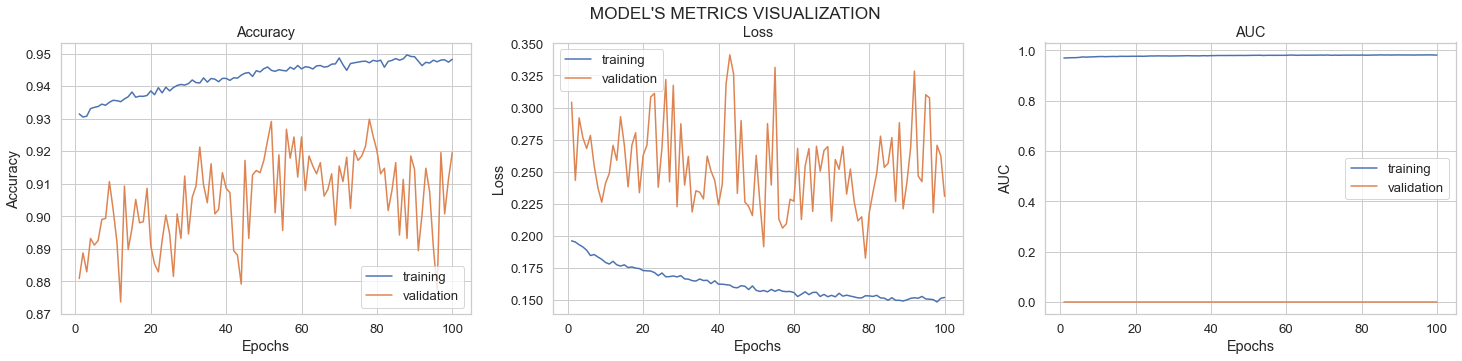

In [107]:
def Train_Val_Plot1(acc,val_acc,loss,val_loss,auc,val_auc):
    
    fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize= (25,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    

    plt.show()
    

Train_Val_Plot1(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc']
              )

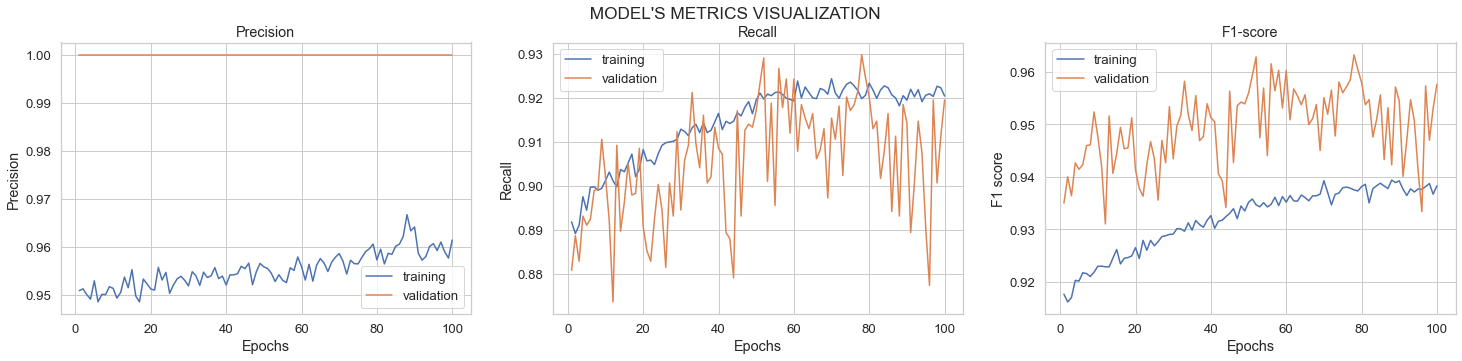

In [108]:
def Train_Val_Plot2(precision,val_precision,recall,val_recall,f1,val_f1):
    
    fig, (ax4,ax5,ax6) = plt.subplots(1,3, figsize= (25,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

   
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), recall)
    ax5.plot(range(1, len(val_f1) + 1), val_recall)
    ax5.set_title('Recall')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('Recall')
    ax5.legend(['training', 'validation'])
    
    ax6.plot(range(1, len(f1) + 1), f1)
    ax6.plot(range(1, len(val_f1) + 1), val_f1)
    ax6.set_title('F1-score')
    ax6.set_xlabel('Epochs')
    ax6.set_ylabel('F1 score')
    ax6.legend(['training', 'validation'])

    plt.show()
    

Train_Val_Plot2(history.history['precision'],history.history['val_precision'],
               history.history['recall'],history.history['val_recall'],
               history.history['f1_score'],history.history['val_f1_score']
              )

# PLOTTING

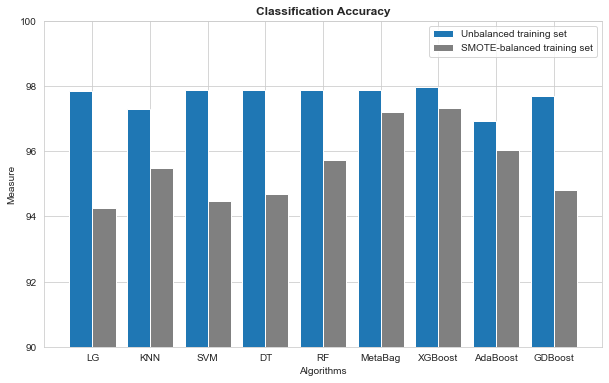

In [44]:
fig = plt.figure(figsize=(10,6))
X = ['LG','KNN','SVM','DT','RF','MetaBag','XGBoost','AdaBoost','GDBoost']
Yunb = [97.83,97.29,97.88,97.87,97.87,97.87,97.97,96.92,97.68]
Zsmote = [94.25,95.48,94.48,94.68,95.73,97.21,97.32,96.03,94.81]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Yunb, 0.4, label = 'Unbalanced training set')
plt.bar(X_axis + 0.2, Zsmote, 0.4, label = 'SMOTE-balanced training set',color='gray')

plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Measure")
plt.title("Classification Accuracy",fontweight='bold')
plt.ylim(90,100)
plt.legend()
plt.show()

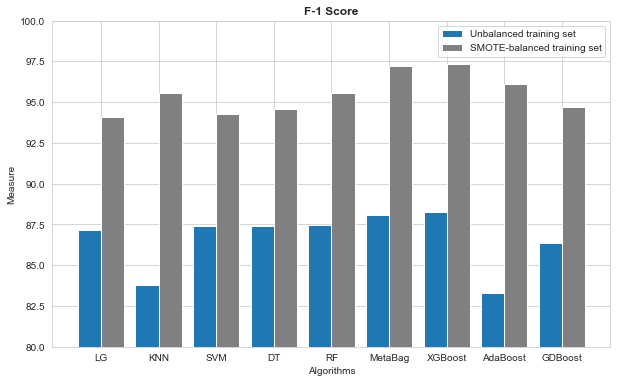

In [43]:
fig = plt.figure(figsize=(10,6))
X = ['LG','KNN','SVM','DT','RF','MetaBag','XGBoost','AdaBoost','GDBoost']
Yunb = [87.15,83.82,87.43,87.42,87.44,88.09,88.25,83.31,86.35]
Zsmote = [94.08,95.56,94.28,94.57,95.59,97.21,97.32,96.12,94.71]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Yunb, 0.4, label = 'Unbalanced training set')
plt.bar(X_axis + 0.2, Zsmote, 0.4, label = 'SMOTE-balanced training set',color='gray')
  
plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Measure")
plt.title("F-1 Score",fontweight='bold')
plt.ylim(80,100)
plt.legend()
plt.show()

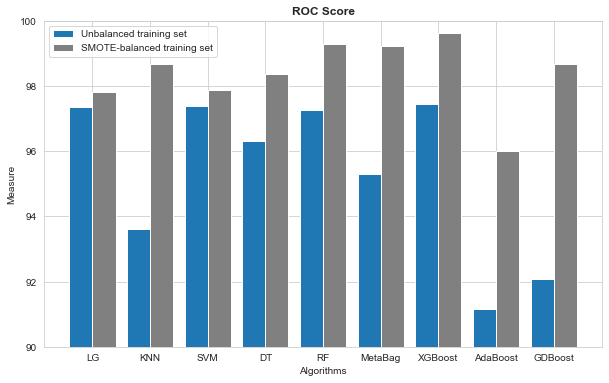

In [42]:
fig = plt.figure(figsize=(10,6))
X = ['LG','KNN','SVM','DT','RF','MetaBag','XGBoost','AdaBoost','GDBoost']
Yunb = [97.35,93.60,97.37,96.30,97.25,95.29,97.45,91.16,92.08]
Zsmote = [97.81,98.66,97.86,98.35,99.29,99.22,99.62,96.00,98.67]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Yunb, 0.4, label = 'Unbalanced training set')
plt.bar(X_axis + 0.2, Zsmote, 0.4, label = 'SMOTE-balanced training set',color='gray')
  
plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Measure")
plt.title("ROC Score",fontweight='bold')
plt.ylim(90,100)
plt.legend()
plt.show()

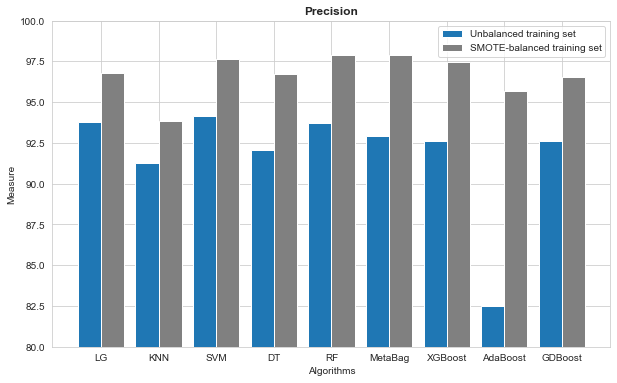

In [41]:
fig = plt.figure(figsize=(10,6))
X = ['LG','KNN','SVM','DT','RF','MetaBag','XGBoost','AdaBoost','GDBoost']
Yunb = [93.81,91.28,94.17,92.06,93.75,92.91,92.61,82.52,92.59]
Zsmote = [96.81,93.85,97.66,96.70,97.92,97.91,97.46,95.66,96.54]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Yunb, 0.4, label = 'Unbalanced training set')
plt.bar(X_axis + 0.2, Zsmote, 0.4, label = 'SMOTE-balanced training set',color='gray')
  
plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Measure")
plt.title("Precision",fontweight='bold')
plt.ylim(80,100)
plt.legend()
plt.show()

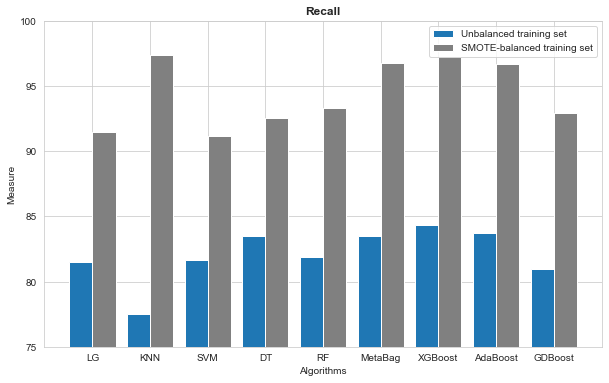

In [39]:
fig = plt.figure(figsize=(10,6))
X = ['LG','KNN','SVM','DT','RF','MetaBag','XGBoost','AdaBoost','GDBoost']
Yunb = [81.51,77.55,81.68,83.52,81.91,83.51,84.37,83.72,81.00]
Zsmote = [91.50,97.34,91.13,92.51,93.34,96.72,97.19,96.66,92.95]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Yunb, 0.4, label = 'Unbalanced training set')
plt.bar(X_axis + 0.2, Zsmote, 0.4, label = 'SMOTE-balanced training set',color='gray')
  
plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Measure")
plt.title("Recall",fontweight='bold')
plt.ylim(75,100)
plt.legend()
plt.show()